In [3]:
%alias package {__import__('sys').executable} -m pip install --quiet --upgrade --upgrade-strategy eager %l

In [4]:
session_storage = 'downloads'

import os
os.makedirs(session_storage, exist_ok=True)

In [5]:
%package fsspec

import fsspec

fs_dataset = fsspec.filesystem(
    'simplecache', 
    target_protocol='https', 
    cache_storage=session_storage
)

In [6]:
%package numpy pandas 

import numpy as np
import pandas as pd
'''
%package swifter
import swifter
swifter.set_defaults(
    npartitions=None,
    dask_thres=1,
    scheduler='processes',
    progress_bar=True,
    progress_bar_desc=None,
    allow_dask_on_strings=True,
    force_parallel=False
)
'''

%package scikit-learn==1.1.3
import sklearn as skl
import sklearn.base
import sklearn.compose
#import sklearn.ensemble
import sklearn.feature_extraction
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.pipeline
#import sklearn.svm

#%package scikit-learn-intelex
#import sklearnex
#sklearnex.patch_sklearn()

#%package xgboost
#import xgboost

In [7]:
#%package tensorflow tensorflow-gpu

import tensorflow as tf
from tensorflow import keras as keras

#from tensorflow.python.ops.numpy_ops import np_config
#np_config.enable_numpy_behavior()

2022-12-10 03:20:49.708392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 03:20:49.865304: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-10 03:20:50.572476: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64:/opt/conda/lib/:/opt/conda/lib/:/opt/cond

In [8]:
%package tensorflow-addons
import tensorflow_addons as tfa

%package tensorboard
%load_ext tensorboard 

In [9]:
%package scikeras

import scikeras as skeras
import scikeras.wrappers

In [10]:
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
def set_constrained_layout(plt):
    plt.rcParams['figure.constrained_layout.use'] = True
set_constrained_layout(plt)

plt.style.use('default')

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def subplots(
    n, 
    ncols = 1, visible = False, 
    *args, **kwargs
):
    fig, axs = plt.subplots(
        *args, **kwargs,
        ncols=ncols, 
        nrows=int(np.ceil(n / ncols))
    )
    for ax in axs.flatten():
        ax.set(visible=visible)
    return fig, axs

## Dataset

In [12]:
# TODO
df_scripts = pd.read_pickle('./dataset.pkl', compression='gzip')

In [13]:
df_scripts

,movie_name,script_text
0,Reservoir Dogs,[\r\n\r\n\r\n\r\n\r\n\r\n ...
1,How to Train Your Dragon,[\r\n\r\n\r\n HOW T...
2,Scream,[ \r\n ...
3,Groundhog Day,[\r\n\r\n \r\n ...
4,Black Panther,[\r\n\r\n\r\n \r\n BL...
...,...,...
1204,You've Got Mail,[\r\n\r\nYou've Got Mail\r\n\r\n\r\n\r\n\t\t\t...
1205,Youth in Revolt,[ \r\n \r\n\r\n ...
1206,Zero Dark Thirty,[\r\n\r\n \r\n ...
1207,Zerophilia,[\r\n\r\n\r\n\r\n ...


In [14]:
df_scripts = df_scripts.astype({
    'movie_name': 'category'
})

In [15]:
df_scripts = df_scripts.explode('script_text', ignore_index=True)

In [16]:
df_scripts.dropna(inplace=True)
df_scripts.reset_index(drop=True, inplace=True)

In [17]:
df_scripts

,movie_name,script_text
0,Reservoir Dogs,\r\n\r\n\r\n\r\n\r\n\r\n ...
1,How to Train Your Dragon,\r\n\r\n\r\n HOW TO...
2,Scream,\r\n ...
3,Groundhog Day,\r\n\r\n \r\n ...
4,Black Panther,\r\n\r\n\r\n \r\n BLA...
...,...,...
1172,You've Got Mail,\r\n\r\nYou've Got Mail\r\n\r\n\r\n\r\n\t\t\tY...
1173,Youth in Revolt,\r\n \r\n\r\n ...
1174,Zero Dark Thirty,\r\n\r\n \r\n ...
1175,Zerophilia,\r\n\r\n\r\n\r\n ...


TODO
GOAL extract the following features from texts:

Feature engineering TODO list: 
- location: Named Entity Recognition
- character: Named Entity Recognition
    see https://keras.io/examples/nlp/ner_transformers/
    see https://towardsdatascience.com/named-entity-recognition-ner-using-keras-bidirectional-lstm-28cd3f301f54
- convo: ??

sentence embedding?

## Feature Engineering

In [18]:
def str_normalize_eol(s, eol=os.linesep):
    return str.join(eol, str.splitlines(s))

In [19]:
%package joblib

import os
import re

import joblib

class ParagraphExtractor(skl.base.TransformerMixin):
    def __init__(self,
        eol=os.linesep,
        eol_freq_min=2,
        n_jobs=1
    ):
        self.eol = eol
        self.eol_freq_min = eol_freq_min
        self.n_jobs = n_jobs

        self._pattern = re.compile(
            fr'(?:{self.eol}\s*?){{{self.eol_freq_min},}}'
        )

    def fit(self, _X, _y=None):
        return self

    def transform(self, X, _y=None):
        def _impl_single(s):
            nonlocal self
            return re.split(
                self._pattern,
                str_normalize_eol(s, eol=self.eol)
            )

        return joblib.Parallel(n_jobs=self.n_jobs)(
            joblib.delayed(_impl_single)(s)
                for s in X
        )

        
df_scripts['script_paragraphs'] = ParagraphExtractor(n_jobs=-1).fit_transform(
    df_scripts['script_text']#.iloc[:100]
)

In [20]:
df_scripts_para = (
    df_scripts[['movie_name', 'script_paragraphs']]
        .explode('script_paragraphs', ignore_index=True)
)

In [21]:
df_scripts_para['script_paragraphs'] = (
    df_scripts_para['script_paragraphs'].str.strip()
)

In [22]:
df_scripts_para = df_scripts_para[
    # non-empty strings
    df_scripts_para['script_paragraphs'].astype(bool)
]

In [23]:
df_scripts_para['movie_name'] = (
    df_scripts_para['movie_name']
        .cat.remove_unused_categories()
)

In [24]:
df_scripts_para

,movie_name,script_paragraphs
1,Reservoir Dogs,Quentin Tarantino's
2,Reservoir Dogs,R E S E R V O I R D O G S
3,Reservoir Dogs,"October 22, 1990"
4,Reservoir Dogs,-----------------
5,Reservoir Dogs,This movie is dedicated to these following sou...
...,...,...
1999878,Zootopia,NICK\n Flash? Flash? Hundred yard dash?!
1999879,Zootopia,Yep. It's Flash the sloth.
1999880,Zootopia,FLASH\n (several beats)\n ...
1999881,Zootopia,CUT TO BLACK:


In [25]:
import string

def _str_letters(s):
    return s.translate(
        str.maketrans(
            '', '', 
            string.punctuation + string.whitespace
        )
    )

def _df_lower_letters(df):
    return _str_letters(df.str).str.lower()

df_scripts_para = df_scripts_para[
    _df_lower_letters(df_scripts_para['movie_name'])
        != _df_lower_letters(df_scripts_para['script_paragraphs'])
]


In [26]:
df_scripts_para

,movie_name,script_paragraphs
1,Reservoir Dogs,Quentin Tarantino's
3,Reservoir Dogs,"October 22, 1990"
4,Reservoir Dogs,-----------------
5,Reservoir Dogs,This movie is dedicated to these following sou...
6,Reservoir Dogs,inspiration:
...,...,...
1999878,Zootopia,NICK\n Flash? Flash? Hundred yard dash?!
1999879,Zootopia,Yep. It's Flash the sloth.
1999880,Zootopia,FLASH\n (several beats)\n ...
1999881,Zootopia,CUT TO BLACK:


In [27]:
df_n_paras = df_scripts_para.groupby('movie_name').count()
df_n_paras[df_n_paras['script_paragraphs'] < 10]

,script_paragraphs
movie_name,
Ace Ventura: Pet Detective,3
American Outlaws,1
Days of Heaven,2
Erik the Viking,2
Fletch,2
Four Feathers,8
Highlander: Endgame,4
Made,1
Never Been Kissed,5


In [59]:
# TODO treat these samples separately
# e.g. those without line breaks between paragraphs 
# (so only one line break after each para)

df_scripts_outliers = df_scripts_para[
    df_scripts_para['movie_name'].isin(
        df_n_paras[df_n_paras['script_paragraphs'] < 10].index
    )
]
#df_scripts_outliers

In [29]:
# TODO lxml to parse html
#print(df_scripts[df_scripts['movie_name'] == 'They Script'].iloc[0]['script_text'][:10000])

Paragraph count stats

In [60]:
df_n_paras.describe()

,script_paragraphs
count,1126.000000
mean,1691.282416
std,543.039628
min,1.000000
25%,1470.250000
50%,1724.500000
75%,1954.750000
max,5265.000000


Paragraph count distribution

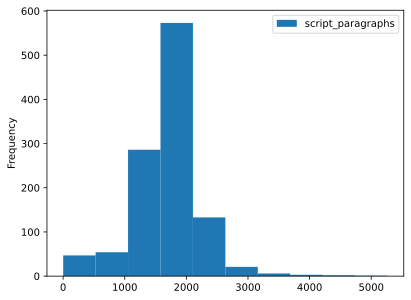

In [30]:
_ = df_n_paras.plot.hist()

## Models

### Neural Network (LSTM RNN)

#### Text Transformers

#### Classifier

In [102]:
class KerasTextClassifier(
    skl.base.BaseEstimator,
    skl.base.ClassifierMixin
):
    def __init__(self, 
        batch_size=128,
        epochs=1,
        optimizer='adam',
        verbose='auto',
        callbacks=[]
    ):
        super().__init__()

        self.batch_size = batch_size
        self.epochs = epochs

        self.optimizer = optimizer

        self.verbose = verbose
        self.callbacks = callbacks

    def _default_kwargs(self, kwargs):
        return {
            'verbose': self.verbose,
            **kwargs,
            'callbacks': 
                kwargs.get('callbacks', []) 
                    + self.callbacks
        }
        
    def fit(self, X, y, vocabulary=None, **kwargs):
        loss = 'sparse_categorical_crossentropy'

        self.target_encoder = (
            skeras.utils.transformers.ClassifierLabelEncoder(
                loss=loss
            )
        )
        self.target_encoder = self.target_encoder.fit(y)

        self.feature_encoder = (
            keras.layers.TextVectorization(
                output_mode='int',
                vocabulary=vocabulary,
                ragged=True
            )
        )
        if vocabulary is None:
            self.feature_encoder.adapt(X)

        self.base = keras.Sequential([
            self.feature_encoder,

            keras.layers.Embedding(
                input_dim=self.feature_encoder.vocabulary_size(),
                output_dim=128,
                #mask_zero=True
            ),

            #keras.layers.SpatialDropout1D(.2),

            keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(64)),

            keras.layers.Dense(128, activation='relu'),

            keras.layers.Dense(
                units=len(self.target_encoder.classes_),
                activation='softmax'
            )
        ])

        self.base.compile(
            optimizer=self.optimizer,
            loss=loss,
            metrics=['accuracy']
        )
        y = self.target_encoder.transform(y)
        self.base.fit(
            X, y, 
            **{
                'epochs': self.epochs,
                'batch_size': self.batch_size,
                **self._default_kwargs(kwargs)
            }
        )

        return self
        
    def predict(self, X, **kwargs):
        y = self.base.predict(X, **{
            'batch_size': self.batch_size,
            **self._default_kwargs(kwargs)
        })
        return self.target_encoder.inverse_transform(y)

    def score(self, X, y, sample_weight=None, **kwargs):
        y_pred = self.predict(X, **kwargs)
        return skl.metrics.balanced_accuracy_score(y, y_pred)

#### Predictor (Vocab From Spacy)

In [103]:
def get_vocabulary(X, **kwargs):
    v = keras.layers.TextVectorization(**kwargs)
    v.adapt(X)
    return v.get_vocabulary()

class TextClassifierCV(
    skl.base.BaseEstimator,
    skl.base.ClassifierMixin
):
    def __init__(self, 
        options_vectorizer=dict(),
        options_clf=dict(),
        options_gridsearch=dict()
    ):
        super().__init__()
        self.options_vectorizer = options_vectorizer
        self.options_clf = options_clf
        self.options_gridsearch = options_gridsearch

    def fit(self, X, y, **kwargs):
        self.base = (
            skl.model_selection.GridSearchCV(
                KerasTextClassifier(
                    **self.options_clf,
                ),
                **self.options_gridsearch,
                param_grid={
                    'epochs': [50],
                    'batch_size': [512]
                },
                cv=skl.model_selection.RepeatedStratifiedKFold(
                    n_splits=3, n_repeats=1
                )
            )
                .fit(X, y, 
                    vocabulary=get_vocabulary(X), 
                    **kwargs
                )
        )

        return self

    def best_estimator(self):
        return self.base.best_estimator_

    def best_score(self):
        return self.base.best_score_

In [104]:
class IMSDBParagraphTrainer:
    def __init__(self, 
        col_name='movie_name', 
        col_script_paragraphs='script_paragraphs',
        options_clf=dict(),
        options_gridsearch=dict()
    ):
        self.col_name = col_name
        self.col_script_paragraphs = col_script_paragraphs

        self.base = TextClassifierCV(
            options_vectorizer=dict(
                max_tokens=None,
                standardize='lower_and_strip_punctuation',
                split='whitespace',
                #ngrams=(1, 2),
                #output_sequence_length=64
            ),
            options_clf=dict(
                **options_clf,
            ),
            options_gridsearch=dict(
                refit=True,
                **options_gridsearch
            )
        )

    def fit(self, df: pd.DataFrame, **kwargs):
        self.base = self.base.fit(
            X=np.array(df[self.col_script_paragraphs]),
            y=np.array(df[self.col_name]),
            **kwargs
        )
        return self

    def best_estimator(self):
        return self.base.best_estimator()

    def best_score(self):
        return self.base.best_score()

In [105]:
model = IMSDBParagraphTrainer(
    options_clf=dict(
        verbose=0,
        callbacks=[
            tfa.callbacks.TQDMProgressBar(
                show_epoch_progress=False
            )
            #keras.callbacks.EarlyStopping(
            #    monitor='loss', 
            #    patience=3, 
            #    min_delta=0.0001
            #)
        ]
    ),
    options_gridsearch=dict(
        verbose=3,
        error_score='raise',
        #n_jobs=-1
    )
)

Train on the first few samples

In [107]:
df_scripts_para_ = df_scripts_para.drop(df_scripts_outliers.index)
df_scripts_para_ = df_scripts_para_[
    df_scripts_para_['movie_name'].isin(
        pd.Series(df_scripts_para_['movie_name'].unique()).head(5)
    )
]
df_scripts_para_['movie_name'] = (
    df_scripts_para_['movie_name']
        .cat.remove_unused_categories()
)
df_scripts_para_ = df_scripts_para_.groupby('movie_name').head(10)

_ = model.fit(df_scripts_para_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Training:   0%|                                                                                   0/50 ETA: ?s…

[CV 1/3] END .........batch_size=512, epochs=50;, score=0.200 total time=  16.4s


Training:   0%|                                                                                   0/50 ETA: ?s…

[CV 2/3] END .........batch_size=512, epochs=50;, score=0.200 total time=  14.5s


Training:   0%|                                                                                   0/50 ETA: ?s…

[CV 3/3] END .........batch_size=512, epochs=50;, score=0.417 total time=  16.4s


Training:   0%|                                                                                   0/50 ETA: ?s…

In [139]:
keras.backend.clear_session()

Train on the whole dataset

In [112]:
%tensorboard --logdir '{session_storage}/tensorboard/model_nn_spacy'
_ = model.fit(df_scripts_para, callbacks=[
    keras.callbacks.TensorBoard(
        fr'{session_storage}/tensorboard/model_nn_spacy'
    )
])

Reusing TensorBoard on port 6006 (pid 123661), started 8:19:47 ago. (Use '!kill 123661' to kill it.)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  _, y_idx, y_inv = np.unique(y, return_index=True, return_inverse=True)


Training:   0%|                                                                                   0/50 ETA: ?s…

2022-12-10 05:13:58.780158: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.13GiB (rounded to 3362398464)requested by op CudnnRNNV3
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-12-10 05:13:58.780285: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2022-12-10 05:13:58.780319: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 112, Chunks in use: 112. 28.0KiB allocated for chunks. 28.0KiB in use in bin. 633B client-requested in use in bin.
2022-12-10 05:13:58.780368: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 13, Chunks in use: 10. 6.5KiB allocated for chunks. 5.0KiB in use in bin. 5.0KiB client-requested in use in bin.
2022-12-10 05:13:58.780391: I tensorflow/tsl/framework

CancelledError: Graph execution error:

Detected at node 'sequential_43/bidirectional_86/RaggedConcat/assert_equal_1/Assert/AssertGuard/Assert/data_4' defined at (most recent call last):
    File "/opt/conda/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/conda/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 667, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 456, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 445, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 352, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 647, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 345, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/opt/conda/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2898, in run_cell
      result = self._run_cell(
    File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2944, in _run_cell
      return runner(coro)
    File "/opt/conda/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3169, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3361, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_95666/4026431904.py", line 2, in <module>
      _ = model.fit(df_scripts_para, callbacks=[
    File "/tmp/ipykernel_95666/3291549012.py", line 29, in fit
      self.base = self.base.fit(
    File "/tmp/ipykernel_95666/677089201.py", line 22, in fit
      skl.model_selection.GridSearchCV(
    File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 875, in fit
      self._run_search(evaluate_candidates)
    File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 1379, in _run_search
      cv=cv,
    File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 822, in evaluate_candidates
      out = parallel(
    File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", line 1085, in __call__
      if self.dispatch_one_batch(iterator):
    File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch
      self._dispatch(tasks)
    File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", line 819, in _dispatch
      job = self._backend.apply_async(batch, callback=cb)
    File "/opt/conda/lib/python3.9/site-packages/joblib/_parallel_backends.py", line 208, in apply_async
      result = ImmediateResult(func)
    File "/opt/conda/lib/python3.9/site-packages/joblib/_parallel_backends.py", line 597, in __init__
      self.results = batch()
    File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", line 288, in __call__
      return [func(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", line 288, in <listcomp>
      return [func(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/fixes.py", line 117, in __call__
      return self.function(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
      estimator.fit(X_train, y_train, **fit_params)
    File "/tmp/ipykernel_95666/207934860.py", line 79, in fit
      self.base.fit(
    File "/opt/conda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/keras/layers/rnn/bidirectional.py", line 278, in __call__
      return super().__call__(inputs, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.9/site-packages/keras/layers/rnn/bidirectional.py", line 426, in call
      output = backend.concatenate([y, y_rev])
    File "/opt/conda/lib/python3.9/site-packages/keras/backend.py", line 3570, in concatenate
      return tf.concat(tensors, axis)
Node: 'sequential_43/bidirectional_86/RaggedConcat/assert_equal_1/Assert/AssertGuard/Assert/data_4'
RecvAsync is cancelled.
	 [[{{node sequential_43/bidirectional_86/RaggedConcat/assert_equal_1/Assert/AssertGuard/Assert/data_4}}]] [Op:__inference_train_function_852325]

In [ ]:
model.best_score()

0.2722222222222222

Save the best model

In [109]:
clf_best = model.best_estimator()

In [110]:
clf_best.predict(X=np.array([
    'test', 
    'heehee', 
    'very funny', 
    'can you believe it? she ate the whole thing',
    # description of movie Groundhog Day
    '''
    A cynical TV weatherman finds himself reliving the same day 
    over and over again when he goes on location to the small town 
    of Punxsutawney to film a report about their annual Groundhog Day. 
    His predicament drives him to distraction, 
    until he sees a way of turning the situation to his advantage.
    ''',
    '''
    A cynical TV weatherman finds himself reliving the same day 
    over and over again when he goes on location to a small town
    to film a report about their annual festival. 
    His predicament drives him to distraction, 
    until he sees a way of turning the situation to his advantage.
    ''',
    '''
    TV weatherman went to a small town to film a report about a festival 
    and got trapped in a time loop.
    ''',
    '''
    Man went to a small town to film a report about a festival 
    and got trapped in a time loop.
    '''
]))

array(['Black Panther', 'Black Panther', 'Black Panther', 'Black Panther',
       'Black Panther', 'Black Panther', 'Black Panther', 'Black Panther'],
      dtype=object)

In [50]:
import pickle

with open(fr'{session_storage}/clf_nn_spacy', 'wb') as f:
    pickle.dump(clf_best, f)

INFO:tensorflow:Assets written to: ram:///tmp/tmpyzj6aei4/assets


INFO:tensorflow:Assets written to: ram:///tmp/tmpyzj6aei4/assets


Load the best model

In [51]:
with open(fr'{session_storage}/clf_nn_spacy', 'rb') as f:
    clf_best = pickle.load(f)

In [52]:
clf_best.predict(X=np.array(['test']))

1/1 [==============================] - 1s 1s/step


array(['Anastasia'], dtype=object)

In [472]:
def _clf_test_script_28_days_later(model, df):
    sample = df[df['movie_name'] == '28 Days Later']
    if sample.empty:
        return

    sample_para = '''
    With practiced speed, Selena starts to open the kitchen
          cupboards, selecting packets of biscuits and cans from the
          shelves, and stuffing them into her backpack.
    '''
    return model.predict(X=np.array([
        sample_para,
        'Selena took food from kitchen shelves',
        'Woman backpacking biscuits and cans in the kitchen',
        'Woman searching for food',
        'Selena Quintanilla nació el 16 de abril de 1971 en Lake Jackson, Texas, Estados Unidos',
        'Selena Quintanilla was born on April 16, 1971, in Lake Jackson, Texas, United States',
        'Script'
    ]))
    
_clf_test_script_28_days_later(model, df_scripts_para)

array([['28 Days Later Script'],
       ['28 Days Later Script'],
       ['Blast from the Past, The Script'],
       ['Hackers Script'],
       ['Un Singe en Hiver Script'],
       ['28 Days Later Script'],
       ['Clash of the Titans Script']], dtype=object)

In [455]:
def _clf_test_script_bad_dreams(model, df):
    sample = df[df['movie_name'] == 'Bad Dreams']
    if sample.empty:
        return

    sample_para = sample.iloc[0]['script_paragraphs']

    print(sample_para)
    return model.predict(X=np.array([
        sample_para,
        'Synthia betrayed Unity House and is ashamed of herself',
        'Woman betrayed the cult and is ashamed of herself',
        'Woman betrayed the cult',
        'Woman is ashamed of herself',
        'Woman',
        'Script'
    ]))

_clf_test_script_bad_dreams(model, df_scripts_para)

CYNTHIA (CONT'D)
               I'm guilty of lying... to Unity
               House. I promised to be part of
               it... Forever. They expected me
               to keep my word.
                   (pause)
               They still do.


array([['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script']], dtype=object)